#### Converting Policy Sales Channel to Dummy ####

Try to manually bin the policy channels based on the mean response. However, we will first need to take out the channels which have not been used, i.e. those with a low count. The means for these channels may not present a true picture due to the not having enough data points

In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sb

In [3]:
with open('preprocessed_data_frame', 'rb') as f:
    df = pickle.load(f)

with open('target', 'rb') as f:
    target = pickle.load(f)

In [4]:
# Add response back. Bins will be created based on the probabilities of success, i.e. the average response
df['Response'] = target

In [5]:
# 155 sales channels. These need to be onverted to categories.
grouped_by_policy_channel = df.groupby('Policy_Sales_Channel').agg(['mean', 'count'])['Response'].sort_values(by='count', ascending=False).reset_index()

In [6]:
grouped_by_policy_channel.head()

,Policy_Sales_Channel,mean,count
0,152.0,0.028624,134784
1,26.0,0.199385,79700
2,124.0,0.189148,73995
3,160.0,0.021810,21779
4,156.0,0.215458,10661


In [7]:
# Dropping the channels with less than 400 samples. 400 is the sample size needed for a 5% error rate, 95% confidence
sales_channel_count_under_400 = grouped_by_policy_channel[grouped_by_policy_channel['count']<400]
sales_channel_count_over_400 = grouped_by_policy_channel[grouped_by_policy_channel['count']>400]

<AxesSubplot:xlabel='mean'>

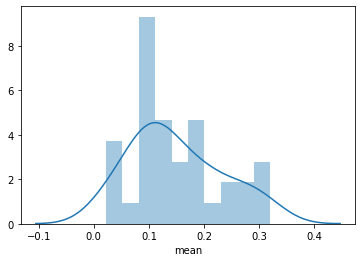

In [8]:
# Distribution is almost normal. Great!
# Since it is from 0 to 0.35, 7 bins will make sense
sb.distplot(sales_channel_count_over_400['mean'], bins=10)

In [9]:
channel_bins = np.linspace(0, 0.35, 8)
channel_bins

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35])

In [10]:
# Create bins, using labels 1 to 7
sales_channel_count_over_400['label'] = pd.cut(sales_channel_count_over_400['mean'], channel_bins, labels=[1, 2, 3, 4, 5, 6, 7])

<ipython-input-10-90d3213e9ace>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_channel_count_over_400['label'] = pd.cut(sales_channel_count_over_400['mean'], channel_bins, labels=[1, 2, 3, 4, 5, 6, 7])


In [11]:
sales_channel_count_over_400

,Policy_Sales_Channel,mean,count,label
0,152.0,0.028624,134784,1
1,26.0,0.199385,79700,4
2,124.0,0.189148,73995,4
3,160.0,0.021810,21779,1
4,156.0,0.215458,10661,5
5,122.0,0.173212,9930,4
6,157.0,0.268402,6684,6
7,154.0,0.245954,5993,5
8,151.0,0.031403,3885,1
9,163.0,0.304183,2893,7


In [12]:
grouped_by_policy_channel = sales_channel_count_over_400.append(sales_channel_count_under_400)

In [13]:
grouped_by_policy_channel

,Policy_Sales_Channel,mean,count,label
0,152.0,0.028624,134784,1
1,26.0,0.199385,79700,4
2,124.0,0.189148,73995,4
3,160.0,0.021810,21779,1
4,156.0,0.215458,10661,5
...,...,...,...,...
150,149.0,0.000000,1,NaN
151,84.0,0.000000,1,NaN
152,123.0,1.000000,1,NaN
153,144.0,0.000000,1,NaN


In [14]:
# The NaNs in the label are the channels with less than 400 count. Replace with a 0
grouped_by_policy_channel.fillna(0, inplace=True)

In [15]:
df = pd.merge(df, grouped_by_policy_channel[['Policy_Sales_Channel', 'label']])
df.rename(columns={'label':'Policy_Sales_Channel_Label'}, inplace=True)

In [16]:
df

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Policy_Sales_Channel_Label
0,Male,44,28,0,> 2 Years,Yes,40454.0,26,217,1,4
1,Male,76,3,0,1-2 Year,No,33536.0,26,183,0,4
2,Male,47,28,0,> 2 Years,Yes,38294.0,26,27,1,4
3,Female,56,28,0,1-2 Year,Yes,32031.0,26,72,1,4
4,Male,79,28,0,1-2 Year,Yes,57444.0,26,222,0,4
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,39,28,0,1-2 Year,Yes,40220.0,50,92,0,0
381105,Female,73,28,0,1-2 Year,Yes,44272.0,50,276,0,0
381106,Male,67,28,1,1-2 Year,No,33236.0,144,290,0,0
381107,Male,74,17,0,1-2 Year,Yes,2630.0,143,15,0,0


In [17]:
grouped_by_region = df.groupby('Region_Code').agg(['mean', 'count'])['Response'].reset_index()

In [18]:
region_bins = np.linspace(0, 0.25, 6)
region_bins

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25])

<AxesSubplot:xlabel='mean'>

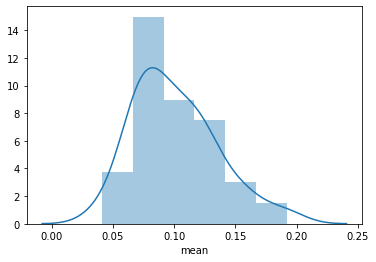

In [19]:
sb.distplot(grouped_by_region['mean'])

In [20]:
grouped_by_region['label'] = pd.cut(grouped_by_region['mean'], bins=region_bins, labels=[1, 2, 3, 4, 5], ).astype('int')
grouped_by_region.iat[28, -1] = 5

In [21]:
df = pd.merge(df, grouped_by_region[['Region_Code', 'label']])
df.rename(columns={'label':'Region_Code_Labels'}, inplace=True)

In [22]:
df['Policy_Sales_Channel_Label'].value_counts()

4    166256
1    161522
5     17163
3     11372
6      7807
0      6255
2      6084
7      4650
Name: Policy_Sales_Channel_Label, dtype: int64

In [23]:
df['Region_Code_Labels'].value_counts()

2    155855
3    108023
5    106415
4      7505
1      3311
Name: Region_Code_Labels, dtype: int64

In [24]:
df

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Policy_Sales_Channel_Label,Region_Code_Labels
0,Male,44,28,0,> 2 Years,Yes,40454.0,26,217,1,4,5
1,Male,47,28,0,> 2 Years,Yes,38294.0,26,27,1,4,5
2,Female,56,28,0,1-2 Year,Yes,32031.0,26,72,1,4,5
3,Male,79,28,0,1-2 Year,Yes,57444.0,26,222,0,4,5
4,Male,39,28,0,1-2 Year,Yes,57582.0,26,141,0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,42,44,1,1-2 Year,No,40550.0,65,158,0,0,1
381105,Male,45,44,0,1-2 Year,Yes,34972.0,65,224,0,0,1
381106,Male,63,44,1,1-2 Year,No,28128.0,116,148,0,0,1
381107,Male,30,44,1,< 1 Year,No,30339.0,107,37,0,0,1


In [25]:
df = df.drop(['Policy_Sales_Channel', 'Region_Code'], axis=1)

In [26]:
# Convert the channel and region labels into cateogries
df[['Policy_Sales_Channel_Label', 'Region_Code_Labels']] = df[['Policy_Sales_Channel_Label', 'Region_Code_Labels']].astype('object')

In [27]:
df.dtypes

Gender                         object
Age                             int64
Previously_Insured              int64
Vehicle_Age                    object
Vehicle_Damage                 object
Annual_Premium                float64
Vintage                         int64
Response                        int64
Policy_Sales_Channel_Label     object
Region_Code_Labels             object
dtype: object

In [28]:
df

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Policy_Sales_Channel_Label,Region_Code_Labels
0,Male,44,0,> 2 Years,Yes,40454.0,217,1,4,5
1,Male,47,0,> 2 Years,Yes,38294.0,27,1,4,5
2,Female,56,0,1-2 Year,Yes,32031.0,72,1,4,5
3,Male,79,0,1-2 Year,Yes,57444.0,222,0,4,5
4,Male,39,0,1-2 Year,Yes,57582.0,141,0,4,5
...,...,...,...,...,...,...,...,...,...,...
381104,Male,42,1,1-2 Year,No,40550.0,158,0,0,1
381105,Male,45,0,1-2 Year,Yes,34972.0,224,0,0,1
381106,Male,63,1,1-2 Year,No,28128.0,148,0,0,1
381107,Male,30,1,< 1 Year,No,30339.0,37,0,0,1


In [29]:
# Make dummies of the labels, as well as the other categorical variables
df = pd.get_dummies(df, drop_first=True)

In [30]:
# Drop the response column now
df = df.drop('Response', axis=1)

In [31]:
# Rename the columns which have a '<' or a '>' in it, otherwise it will not work with XGBoost
df = df.rename(columns={'Vehicle_Age_< 1 Year':'Vehicle_Age_Under_1_Year', 'Vehicle_Age_> 2 Years': 'Vehicle_Age_Over_2_Years'})

In [32]:
df

,Age,Previously_Insured,Annual_Premium,Vintage,Gender_Male,Vehicle_Age_Under_1_Year,Vehicle_Age_Over_2_Years,Vehicle_Damage_Yes,Policy_Sales_Channel_Label_1,Policy_Sales_Channel_Label_2,Policy_Sales_Channel_Label_3,Policy_Sales_Channel_Label_4,Policy_Sales_Channel_Label_5,Policy_Sales_Channel_Label_6,Policy_Sales_Channel_Label_7,Region_Code_Labels_2,Region_Code_Labels_3,Region_Code_Labels_4,Region_Code_Labels_5
0,44,0,40454.0,217,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1
1,47,0,38294.0,27,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1
2,56,0,32031.0,72,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,79,0,57444.0,222,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,39,0,57582.0,141,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,42,1,40550.0,158,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
381105,45,0,34972.0,224,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
381106,63,1,28128.0,148,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
381107,30,1,30339.0,37,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
with open('df_binned_regions_channels', 'wb') as f:
    pickle.dump(df, f)

In [68]:
grouped_by_region.rename(columns={'label':'Region_Code_Labels'}, inplace=True)

In [84]:
_ = grouped_by_region[['Region_Code', 'Region_Code_Labels']]
with open('region_labels', 'wb') as f:
    pickle.dump(_, f)

In [71]:
grouped_by_policy_channel.rename(columns={'label':'Policy_Sales_Channel_Label'}, inplace=True)

In [85]:
_ = grouped_by_policy_channel[['Policy_Sales_Channel', 'Policy_Sales_Channel_Label']]
with open('sales_channels_labels', 'wb') as f:
    pickle.dump(_, f)

In [58]:
# Make interaction effects
x = df[['Policy_Sales_Channel_Label_1',
       'Policy_Sales_Channel_Label_2', 'Policy_Sales_Channel_Label_3',
       'Policy_Sales_Channel_Label_4', 'Policy_Sales_Channel_Label_5',
       'Policy_Sales_Channel_Label_6', 'Policy_Sales_Channel_Label_7']]

y = df[['Region_Code_Labels_2', 'Region_Code_Labels_3', 'Region_Code_Labels_4',
       'Region_Code_Labels_5']]

In [59]:
test = {}
for i in x.columns:
    for j in y.columns:
        test[i+'___'+j] = ((x[i]*y[j]).values)
        
additional_features = pd.DataFrame(test)

In [62]:
df[additional_features.columns] = additional_features

In [63]:
df.shape

(381109, 47)

In [65]:
df.head(1)

,Age,Previously_Insured,Annual_Premium,Vintage,Gender_Male,Vehicle_Age_Under_1_Year,Vehicle_Age_Over_2_Years,Vehicle_Damage_Yes,Policy_Sales_Channel_Label_1,Policy_Sales_Channel_Label_2,...,Policy_Sales_Channel_Label_5___Region_Code_Labels_4,Policy_Sales_Channel_Label_5___Region_Code_Labels_5,Policy_Sales_Channel_Label_6___Region_Code_Labels_2,Policy_Sales_Channel_Label_6___Region_Code_Labels_3,Policy_Sales_Channel_Label_6___Region_Code_Labels_4,Policy_Sales_Channel_Label_6___Region_Code_Labels_5,Policy_Sales_Channel_Label_7___Region_Code_Labels_2,Policy_Sales_Channel_Label_7___Region_Code_Labels_3,Policy_Sales_Channel_Label_7___Region_Code_Labels_4,Policy_Sales_Channel_Label_7___Region_Code_Labels_5
0,44,0,40454.0,217,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
with open('df_with_channel_region_interaction', 'wb') as f:
    pickle.dump(df, f)